# Homework 3 (CIFAR-10)

In [1]:
# import analysis packages
import keras
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Data Cleaning

In [2]:
# import dataset
(imgTrain, lblTrain), (imgTest, lblTest) = cifar10.load_data()

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

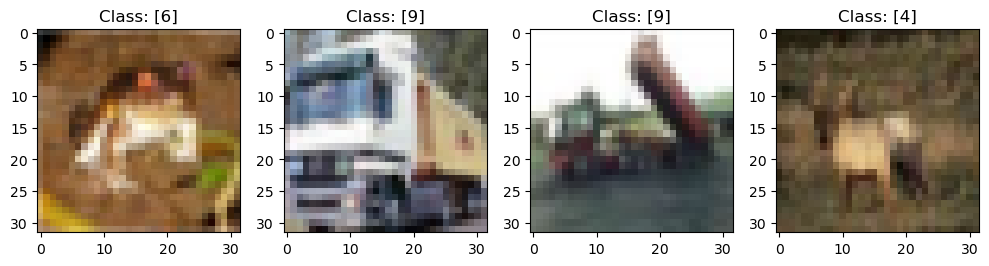

In [3]:
# check dimensions of data
display(imgTrain.shape)
display(lblTrain.shape)
display(imgTest.shape)
display(lblTest.shape)

# plot first few training images
myplot, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,10))
for i in range(4):
    axes[i].imshow(imgTrain[i], cmap=plt.cm.binary)
    axes[i].title.set_text(f"Class: {lblTrain[i]}")
myplot.tight_layout()

In [4]:
# scale image data
imgTrain = imgTrain.astype('float32') / 255
imgTest = imgTest.astype('float32') / 255

# factor categorical response
lblTrain = to_categorical(lblTrain)
lblTest = to_categorical(lblTest)

### Model Fitting

In [5]:
# model fitting and evaluation function
def EvaluateModel(model):
    # set random seed
    np.random.seed(4252023)
    tf.random.set_seed(4252023)

    # compile model
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

    # model summary
    model.summary()

    # number of epochs
    EPOCHS = 50

    # early stopping criteria
    earlyStop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

    # train model
    trained = model.fit(imgTrain, 
                        lblTrain, 
                        epochs = EPOCHS, 
                        batch_size = 64, 
                        validation_split = 0.2,
                        callbacks = earlyStop,
                        verbose = 1)

    # prepare model evaluation
    acc = trained.history['accuracy']
    val_acc = trained.history['val_accuracy']
    loss = trained.history['loss']
    val_loss = trained.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # final validation accuracy
    display(f"Validation accuracy: {round(val_acc[-1] * 100, 2)}%")

    # plot training accuracy
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 5))
    ax1.plot(epochs, acc, 'bo', label = 'Training acc')
    ax1.plot(epochs, val_acc, 'b', label = 'Validation acc')
    ax1.set(xlabel = 'Epochs', ylabel = 'Accuracy')
    ax1.legend()
    ax2.plot(epochs, loss, 'bo', label = 'Training loss')
    ax2.plot(epochs, val_loss, 'b', label = 'Validation loss')
    ax2.set(xlabel = 'Epochs', ylabel = 'Loss')
    ax2.legend()
    fig.suptitle('Evaluation Metrics')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 7200)              0         
                                                                 
 dense_22 (Dense)            (None, 10)                72010     
                                                                 
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
625/625 [==============================] - 8s 12ms/step - loss: 1.6056 - accuracy: 0.4365 - val_loss: 1.

'Validation accuracy: 63.49%'

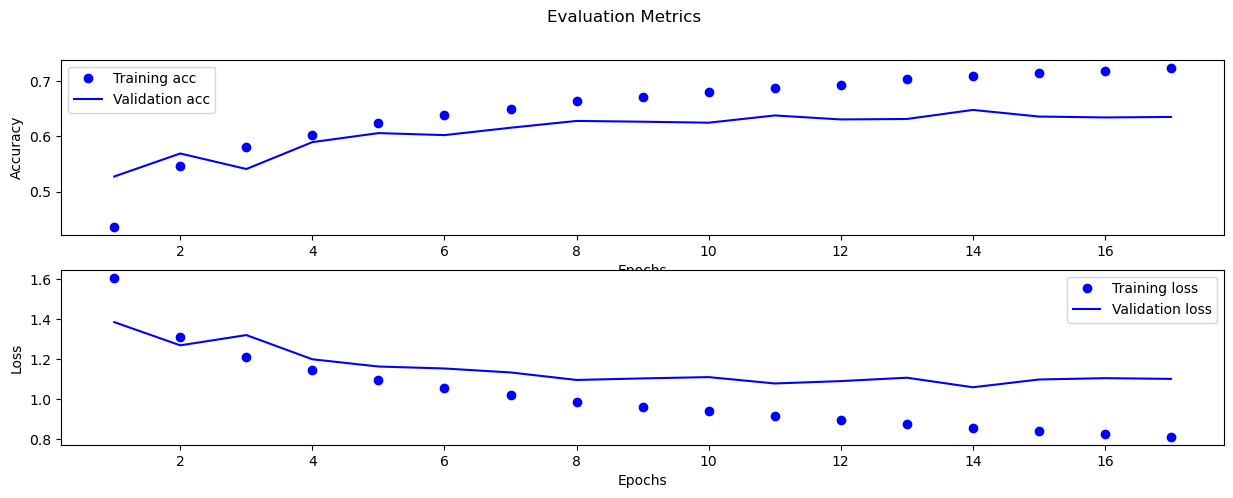

In [21]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 flatten_11 (Flatten)        (None, 512)             

'Validation accuracy: 69.55%'

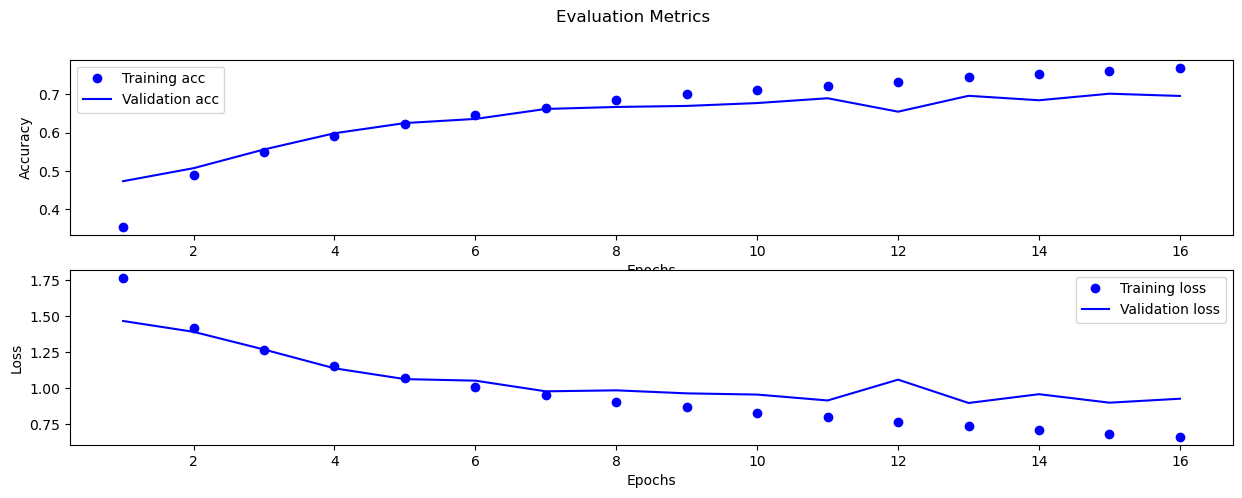

In [22]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 32)          36896     
                                                                 
 flatten_12 (Flatten)        (None, 512)             

'Validation accuracy: 71.7%'

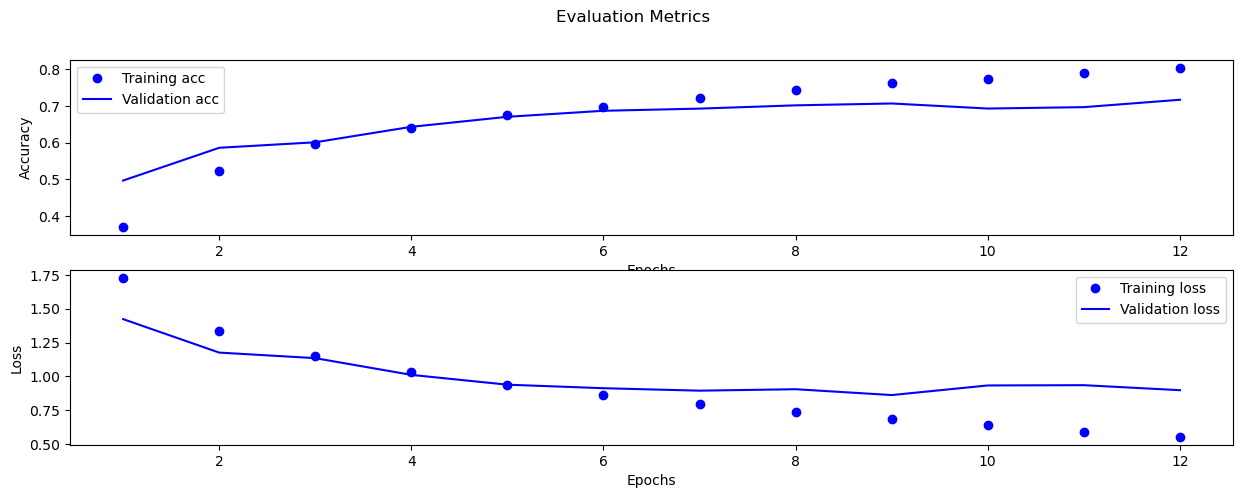

In [23]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          36896     
                                              

2023-04-29 20:43:06.770543: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 18s 27ms/step - loss: 1.6649 - accuracy: 0.3974 - val_loss: 1.3888 - val_accuracy: 0.4930
Epoch 2/50
625/625 [==============================] - 17s 26ms/step - loss: 1.2378 - accuracy: 0.5620 - val_loss: 1.1299 - val_accuracy: 0.6061
Epoch 3/50
625/625 [==============================] - 17s 27ms/step - loss: 1.0359 - accuracy: 0.6359 - val_loss: 1.0790 - val_accuracy: 0.6229
Epoch 4/50
625/625 [==============================] - 17s 27ms/step - loss: 0.9037 - accuracy: 0.6832 - val_loss: 0.9542 - val_accuracy: 0.6635
Epoch 5/50
625/625 [==============================] - 16s 25ms/step - loss: 0.8029 - accuracy: 0.7210 - val_loss: 0.9256 - val_accuracy: 0.6818
Epoch 6/50
625/625 [==============================] - 16s 25ms/step - loss: 0.7209 - accuracy: 0.7500 - val_loss: 0.9058 - val_accuracy: 0.6990
Epoch 7/50
625/625 [==============================] - 16s 26ms/step - loss: 0.6439 - accuracy: 0.7753 - val_loss: 0.8559 - val_accuracy: 0.7219
Epo

'Validation accuracy: 72.14%'

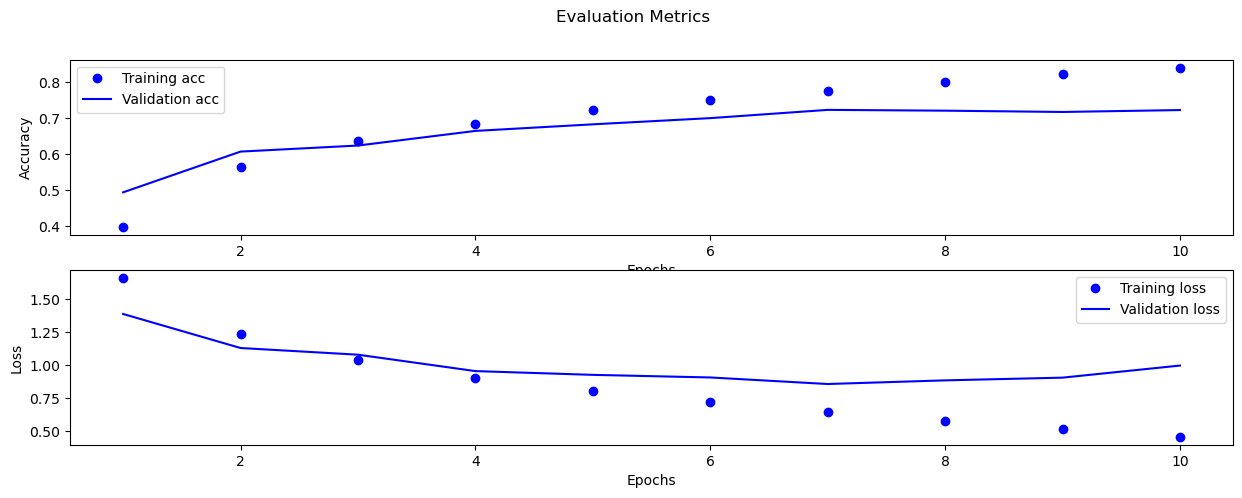

In [6]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 120)              

'Validation accuracy: 68.41%'

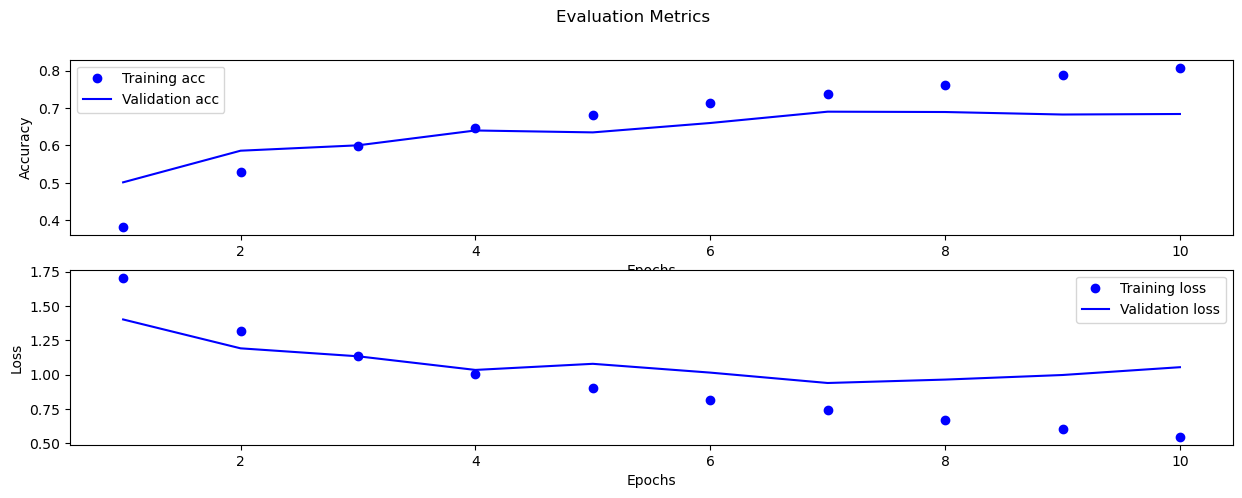

In [7]:
# define model architecture
model = models.Sequential([
    Conv2D(32, (5, 5), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(32, (5, 5), padding = 'same', activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       9728      
                                                                 
 average_pooling2d_2 (Averag  (None, 16, 16, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       409728    
                                                                 
 average_pooling2d_3 (Averag  (None, 8, 8, 128)        0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 120)              

'Validation accuracy: 69.71%'

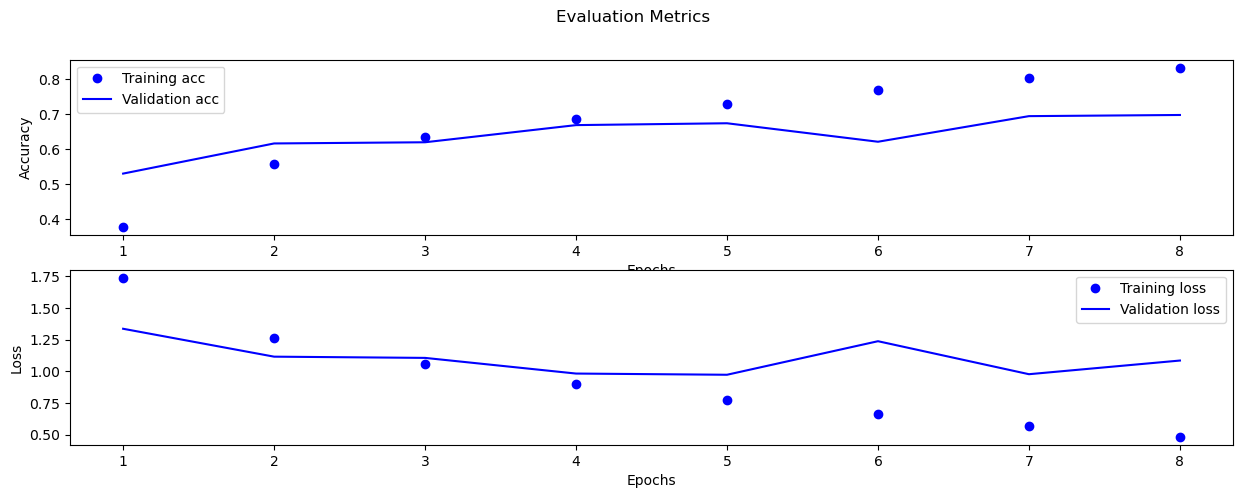

In [8]:
# define model architecture
model = models.Sequential([
    Conv2D(128, (5, 5), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
    AveragePooling2D((2, 2), 2),
    Conv2D(128, (5, 5), padding = 'same', activation = 'relu'),
    AveragePooling2D((2, 2), 2),
    Flatten(),
    Dense(120, activation = 'relu'),
    Dense(84, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

# evaluate model
EvaluateModel(model)

In [ ]:
# define model architecture
model = models.Sequential([
    
])